In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

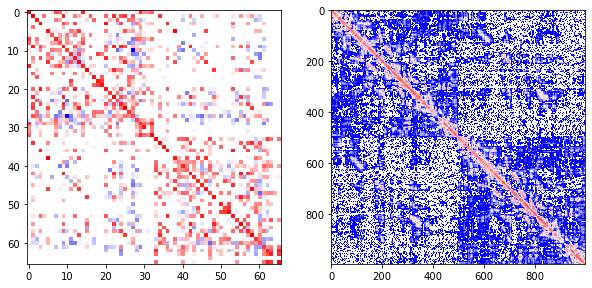

In [2]:
W66=np.loadtxt("../Data/connectivity_matrix/weights.txt")
W998=np.loadtxt("../Data/connectivity_matrix/group_mean_connectivity_matrix_file.txt")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(W66, norm=colors.LogNorm(), cmap='bwr')
plt.subplot(1,2,2)
plt.imshow(W998, norm=colors.LogNorm(), cmap='bwr')

plt.show()

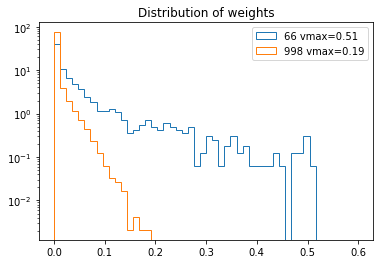

In [3]:
w66=W66.flatten()
w66_0=w66[w66!=0]

w998=W998.flatten()
w998_0=w998[w998!=0]

plt.hist(w66_0,log=True, bins=50,range=(0,0.6),density=True,histtype='step', label='66 vmax=%.2f'%w66_0.max())
plt.hist(w998_0, log=True,bins=50,range=(0,0.6), density=True,histtype='step', label='998 vmax=%.2f'%w998_0.max())
plt.legend()
plt.title('Distribution of weights')
plt.show()

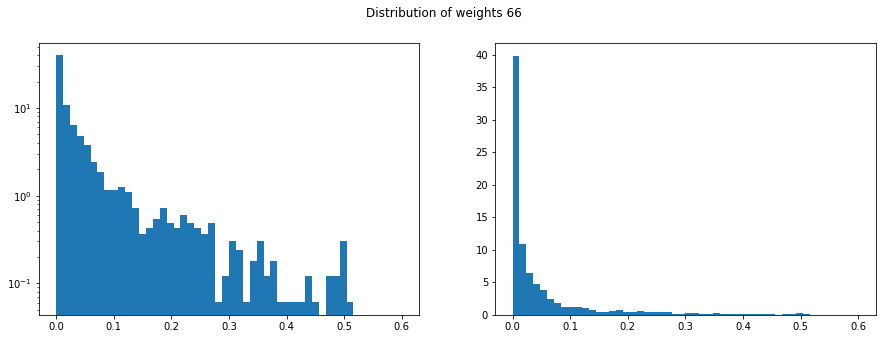

In [4]:
#numpy way

hist, binning =np.histogram(w66_0 ,bins=50,range=(0,0.6), density=True)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(binning[:-1], hist, width=np.diff(binning), align='edge', log=True)
plt.subplot(1,2,2)
plt.bar(binning[:-1], hist, width=np.diff(binning), align='edge')
plt.suptitle('Distribution of weights 66')
#plt.legend()

plt.show()

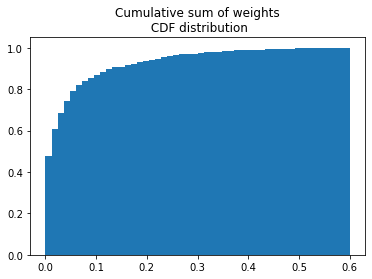

In [5]:
cumsum=np.cumsum(hist/hist.sum())

plt.bar(binning[:-1], cumsum, width=np.diff(binning), align='edge')
plt.title('Cumulative sum of weights\n CDF distribution')
plt.show()

In [6]:
u=np.random.uniform(0,1, 1000)
#g=np.random.randn(1000)/100

w_n=binning[np.searchsorted(cumsum[:-1],u)]
#w_n+=g

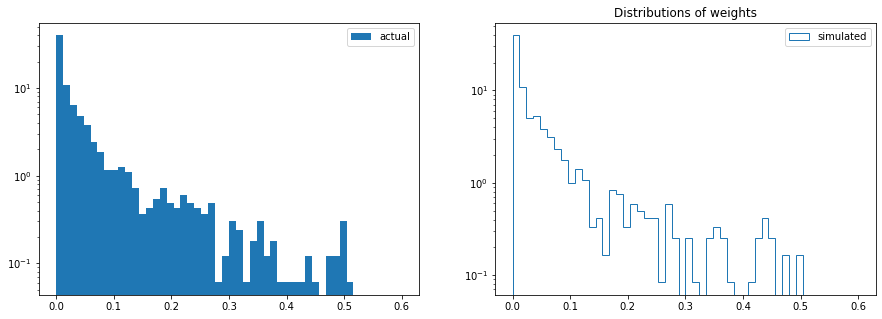

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(binning[:-1], hist, width=np.diff(binning), align='edge', log=True, label='actual')

plt.legend()


plt.subplot(1,2,2)
plt.hist(w_n,log=True, bins=50,range=(0,0.6),density=True,histtype='step', label='simulated')
plt.legend()
plt.title('Distributions of weights')

plt.show()